<a href="https://colab.research.google.com/github/Kaush80/machine_learning/blob/main/deeplr/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torchvision

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [30]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

In [4]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

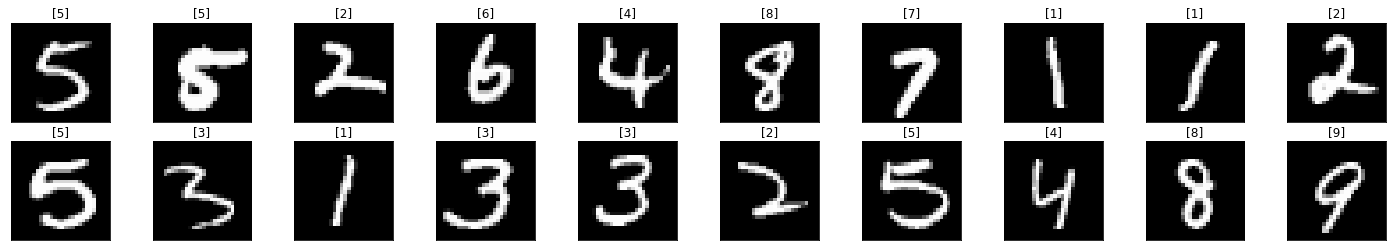

In [5]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1,xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])


In [15]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x


In [17]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [19]:
epochs = 15
running_loss_history=[]
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss+=loss.item()
    running_corrects+=torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss+=val_loss.item()
        val_running_corrects+=torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader)
    epoch_accuracy = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_accuracy)
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_accuracy = val_running_corrects.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_accuracy)

    print('epoch: ', e+1)

    print("training loss: {:.4f}, accuracy :{:.4f}".format(epoch_loss, epoch_accuracy.item()))
    print("validation loss: {:.4f}, accuracy :{:.4f}".format(val_epoch_loss, val_epoch_accuracy.item()))  

epoch:  1
training loss: 0.9310, accuracy :77.6550
validation loss: 0.4267, accuracy :88.2000
epoch:  2
training loss: 0.3814, accuracy :89.1883
validation loss: 0.3252, accuracy :90.7700
epoch:  3
training loss: 0.3198, accuracy :90.7817
validation loss: 0.2849, accuracy :91.8100
epoch:  4
training loss: 0.2866, accuracy :91.7300
validation loss: 0.2650, accuracy :92.2600
epoch:  5
training loss: 0.2637, accuracy :92.3833
validation loss: 0.2428, accuracy :93.1000
epoch:  6
training loss: 0.2423, accuracy :93.0217
validation loss: 0.2230, accuracy :93.5800
epoch:  7
training loss: 0.2241, accuracy :93.5733
validation loss: 0.2089, accuracy :93.8800
epoch:  8
training loss: 0.2068, accuracy :94.0383
validation loss: 0.1972, accuracy :94.3800
epoch:  9
training loss: 0.1918, accuracy :94.4833
validation loss: 0.1870, accuracy :94.5700
epoch:  10
training loss: 0.1800, accuracy :94.7650
validation loss: 0.1715, accuracy :95.0800
epoch:  11
training loss: 0.1676, accuracy :95.1300
validat

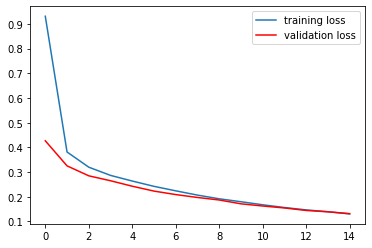

In [22]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss', color='red')
plt.legend()

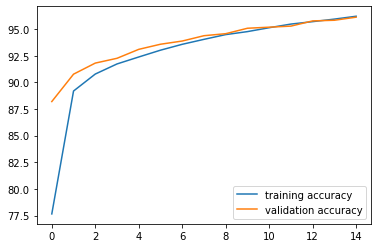

In [23]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [27]:
!pip3 install pillow

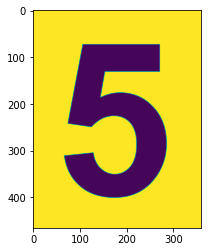

In [43]:
import requests
import PIL.ImageOps
from PIL import Image
url = 'https://static.wikia.nocookie.net/phobia/images/0/03/5.jpg/revision/latest/scale-to-width-down/360?cb=20170102100251'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

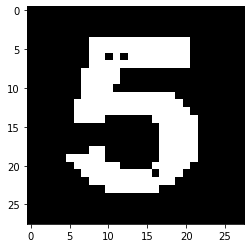

In [44]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [45]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5


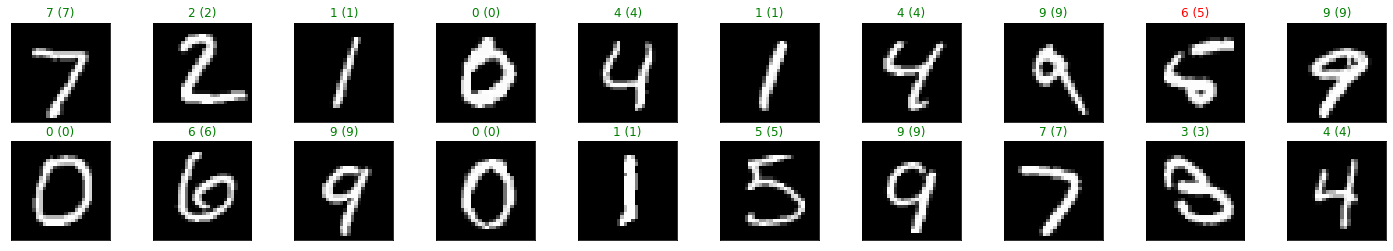

In [49]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1,xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title('{} ({})'.format(str(preds[idx].item()), str(labels[idx].item())), color =("green" if preds[idx]==labels[idx] else "red"))